# Movie Reviews: A Guided project from Dataquest.io



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv("fandango_score_comparison.csv")
%matplotlib inline

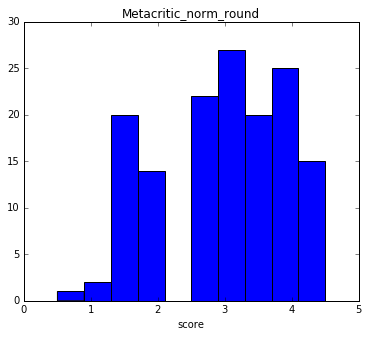

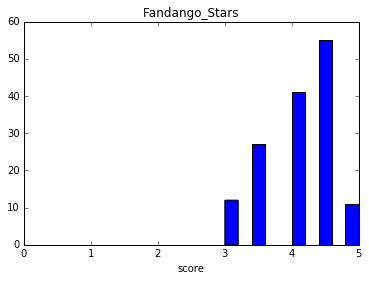

In [3]:
fig = plt.figure(figsize=(6,5))

mc_norm_round = movies['Metacritic_norm_round']
fg_stars = movies['Fandango_Stars']

plt.hist(mc_norm_round)
plt.xlim(0,5)
plt.title("Metacritic_norm_round")
plt.xlabel("score")
plt.show()

plt.hist(fg_stars)
plt.xlim(0,5)
plt.title("Fandango_Stars")
plt.xlabel("score")
plt.show()


We can see from the above histograms that Fandango has a lower variance between scores and higher overall scores compared to metacrtic.

In [4]:
mc_mean = mc_norm_round.mean()
mc_median = mc_norm_round.median()
mc_std = np.std(mc_norm_round)

fg_mean = fg_stars.mean()
fg_median = fg_stars.median()
fg_std = np.std(fg_stars)

print("mc_mean: ",mc_mean)
print("fg_mean: ", fg_mean)

print("mc_median: ", mc_median)
print("fg_median: ", fg_median)

print("mc_std: ", mc_std)
print("fg_std: ", fg_std)


mc_mean:  2.97260273973
fg_mean:  4.08904109589
mc_median:  3.0
fg_median:  4.0
mc_std:  0.987561029704
fg_std:  0.53853216127


We can see that the mean for Fandango is higher than metacritic, the median is higher and the standard deviation is lower.

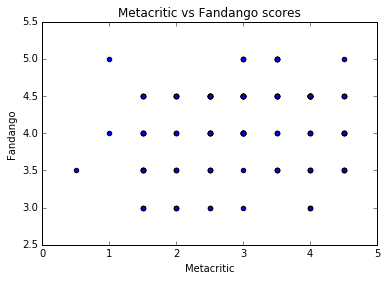

In [5]:
plt.scatter(mc_norm_round, fg_stars)
plt.title("Metacritic vs Fandango scores")
plt.xlabel("Metacritic")
plt.ylabel("Fandango")
plt.show()

In [7]:
movies['fm_diff']=np.absolute(mc_norm_round - fg_stars)
print(movies.sort_values('fm_diff', ascending = False).head(5))


                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

In [13]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(mc_norm_round, fg_stars)

print("r_value", r_value)

r_value 0.178449190739


A low correlation between the scores on metacritic and fandango would suggest that the two sites are scoring movies very differently.

A one on metacritic would get a  3.89708499687  on Fandango
A three on metacritic would get a  4.09170715282  on Fandango
A five on metacritic would get a  4.28632930877  on Fandango


(1, 5)

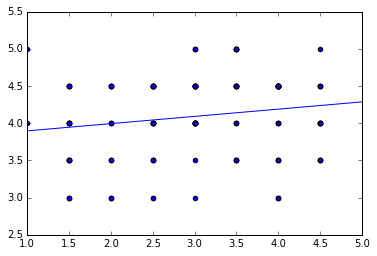

In [29]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std = linregress(mc_norm_round, fg_stars)

# predicting the value of  x(metacritic) = 3 with the equation y = mx + c
pred_1 = slope + intercept
pred_3 = 3 * slope + intercept
pred_5 = 5 * slope + intercept

print("A one on metacritic would get a ", pred_1, " on Fandango")
print("A three on metacritic would get a ", pred_3, " on Fandango")
print("A five on metacritic would get a ", pred_5, " on Fandango")

plt.scatter(mc_norm_round, fg_stars)

#plotting a horizontal line using the predicted values against the nominal
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim(1,5)